In [31]:
import pandas as pd

# Load the training dataset
df = pd.read_csv('train_dataset.csv')


# Display the first few rows
df.head().T

,0,1,2,3,4
age,35.0,20.0,45.0,45.0,20.0
height(cm),170.0,175.0,155.0,165.0,165.0
weight(kg),85.0,110.0,65.0,80.0,60.0
waist(cm),97.0,110.0,86.0,94.0,81.0
eyesight(left),0.9,0.7,0.9,0.8,1.5
eyesight(right),0.9,0.9,0.9,0.7,0.1
hearing(left),1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0
systolic,118.0,119.0,110.0,158.0,109.0
relaxation,78.0,79.0,80.0,88.0,64.0


In [32]:
print(df.dtypes)

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

# df.describe()

In [35]:
print(df.isnull().sum())

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


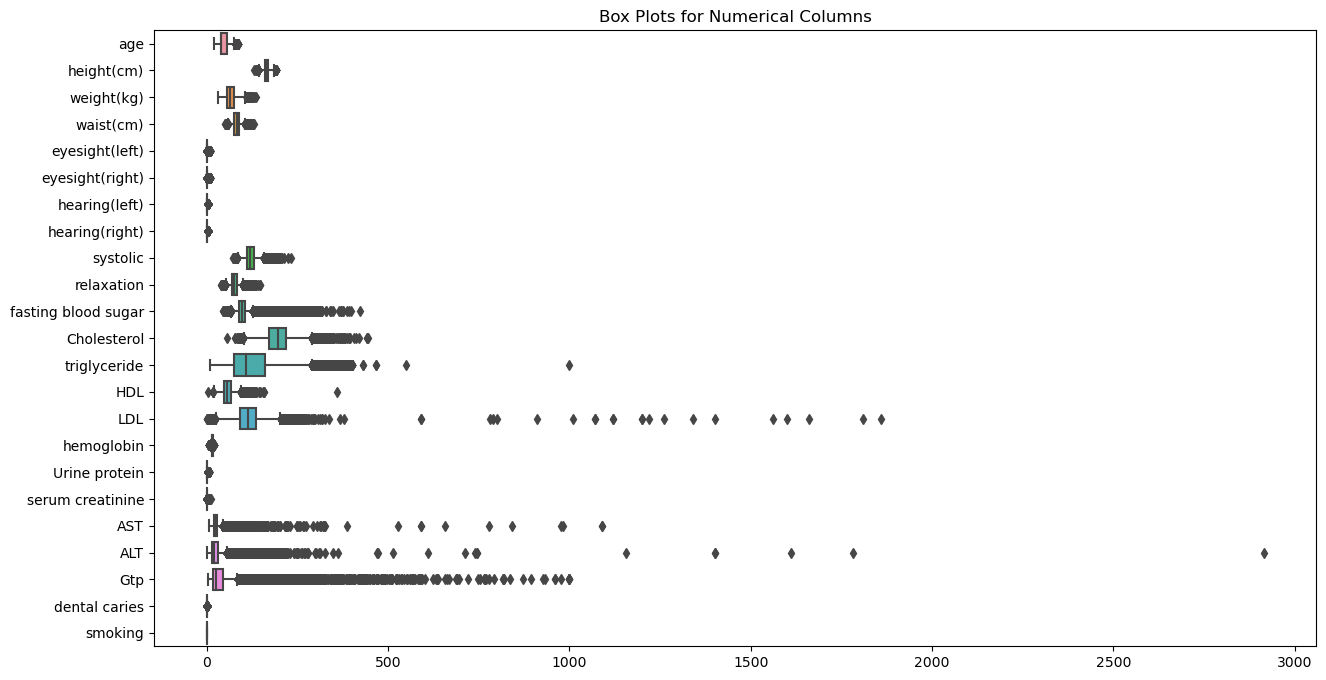

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['number'])  # Select only numerical columns
plt.figure(figsize=(15, 8))  # Adjust the figure size
sns.boxplot(data=numerical_columns, orient='h')  # Create horizontal box plots
plt.title("Box Plots for Numerical Columns")
plt.show()

**Outlier Handling:**

In the analysis of this dataset, we have chosen to retain outliers in the following columns: "Gtp," "LDL," and "Fasting Blood Sugar." The decision to keep these outliers is based on the following considerations:

1. **Domain Knowledge:** The extreme values in these columns are biologically plausible and could be indicative of rare but important medical conditions or variations in the data.

2. **Data Integrity:** While the outliers represent unusual values, there is no evidence to suggest that they result from data entry errors or anomalies. These values are genuine observations and not likely to distort the overall analysis.

3. **Impact on Analysis:** Preliminary sensitivity analyses have indicated that retaining the outliers does not significantly affect the statistical results or the performance of machine learning models. Moreover, we believe that removing these outliers would result in the loss of valuable information.


In [37]:
# Removing duplicate rows

print("Number of duplicate rows: ", df[df.duplicated() == True].shape[0])
print(f"Rows in original Dataframe: {df.shape[0]}")

new_df = df.drop_duplicates()

print(f"Dataframe rows after removing duplicates: {new_df.shape[0]}")

Number of duplicate rows:  5517
Rows in original Dataframe: 38984
Dataframe rows after removing duplicates: 33467


# Smokers and Non-Smokers

In [38]:
df_smoking = new_df['smoking'].value_counts().rename_axis('smoking').reset_index(name='counts')
df_smoking

,smoking,counts
0,0,21209
1,1,12258


In [39]:
smokeYes = new_df[new_df["smoking"] == 1].shape[0]
smokeNo = new_df[new_df["smoking"] == 0].shape[0]

print("People who smoke: ", smokeYes)
print("People who DO NOT smoke: ", smokeNo)

People who smoke:  12258
People who DO NOT smoke:  21209


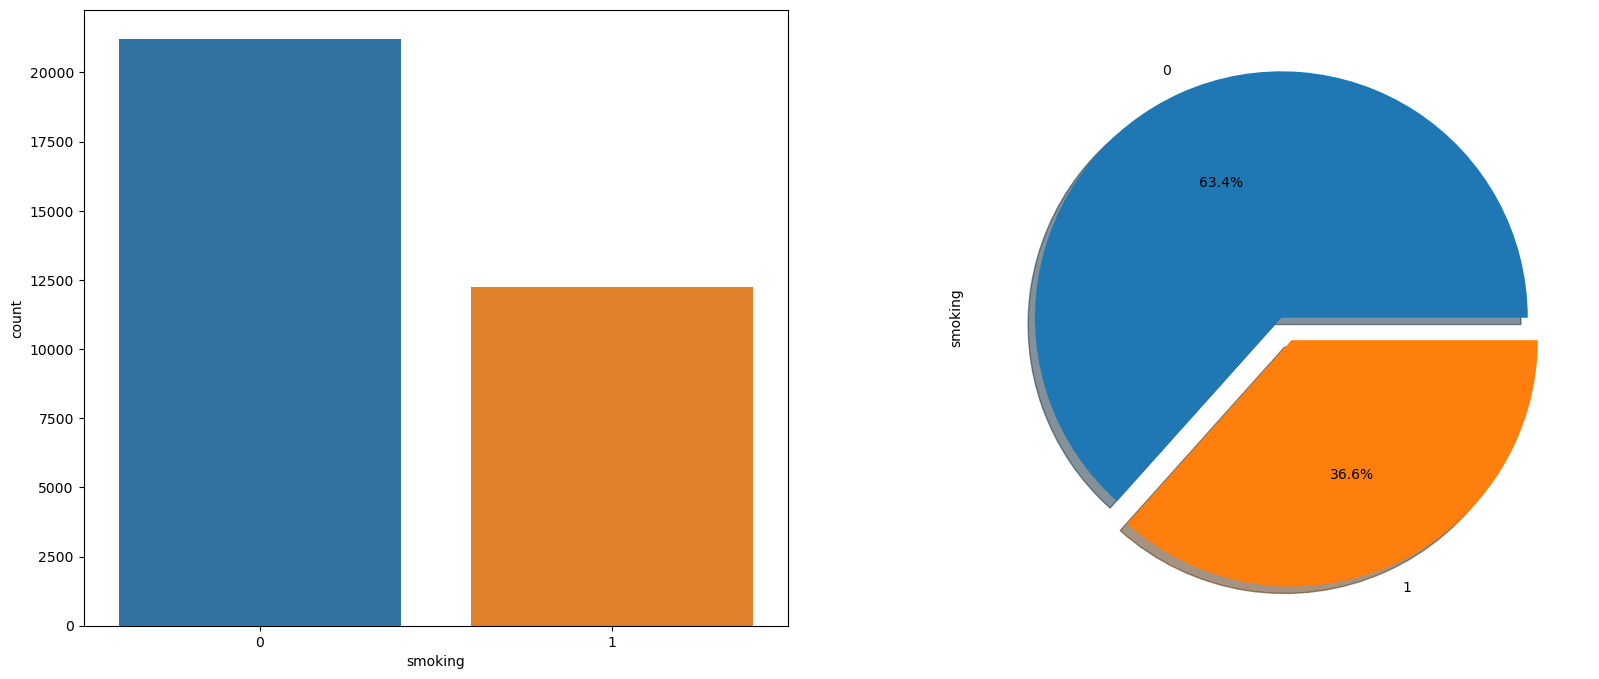

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=new_df, x="smoking", ax=ax[0])
new_df["smoking"].value_counts().plot.pie(ax=ax[1], shadow=True, explode=[0, 0.1], autopct="%1.1f%%")

plt.show()

**The number of people who smoke are much less than the number of people who DO NOT smoke**

    Only 36.6% people actually smoke
    Rest 63.4% do not smoke

In [41]:
categorical = [feature for feature in new_df.columns if new_df[feature].nunique()<20]

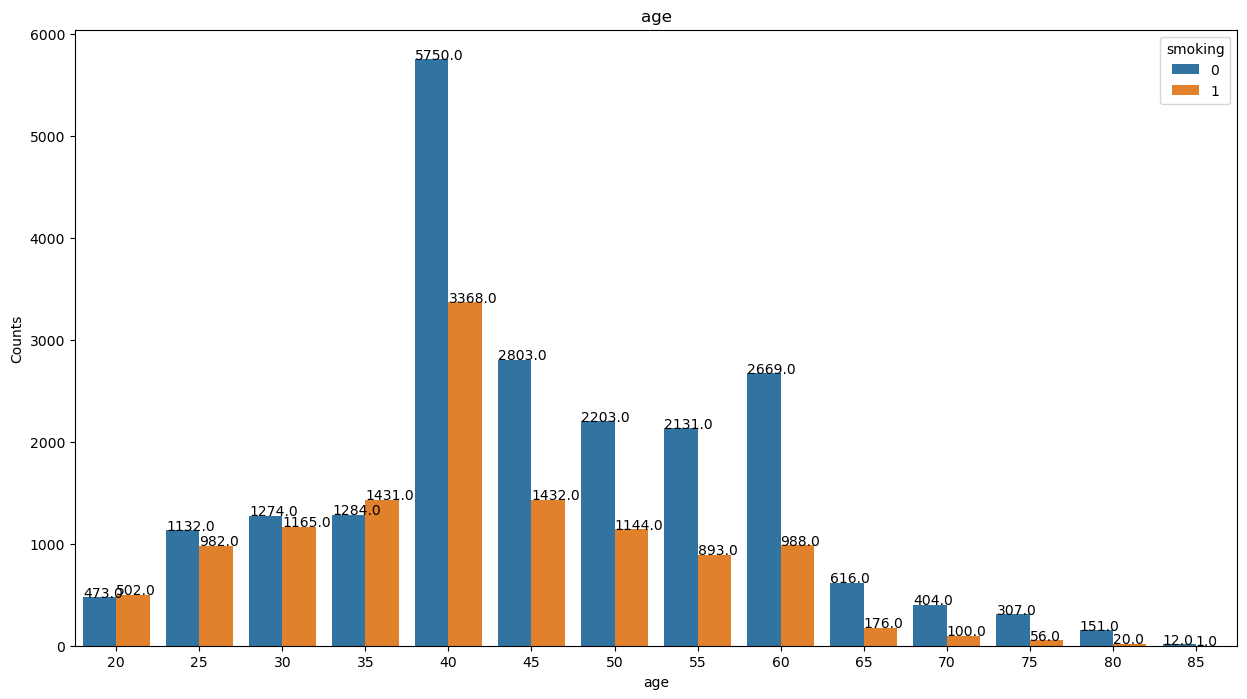

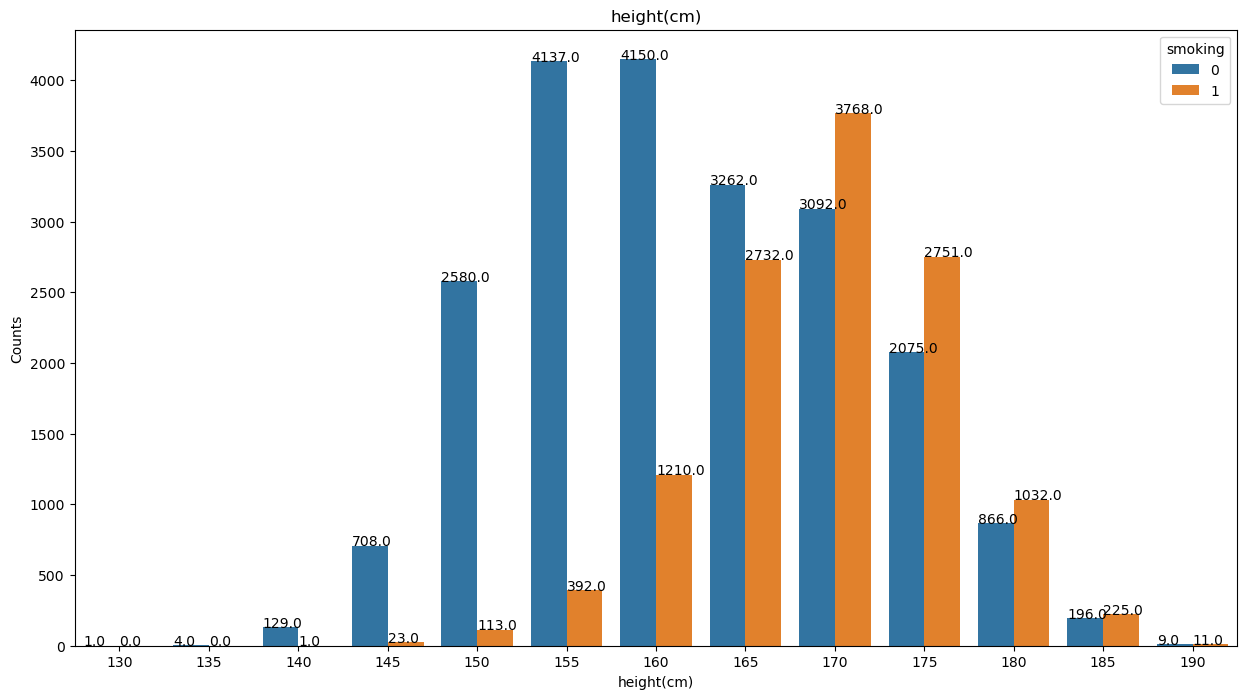

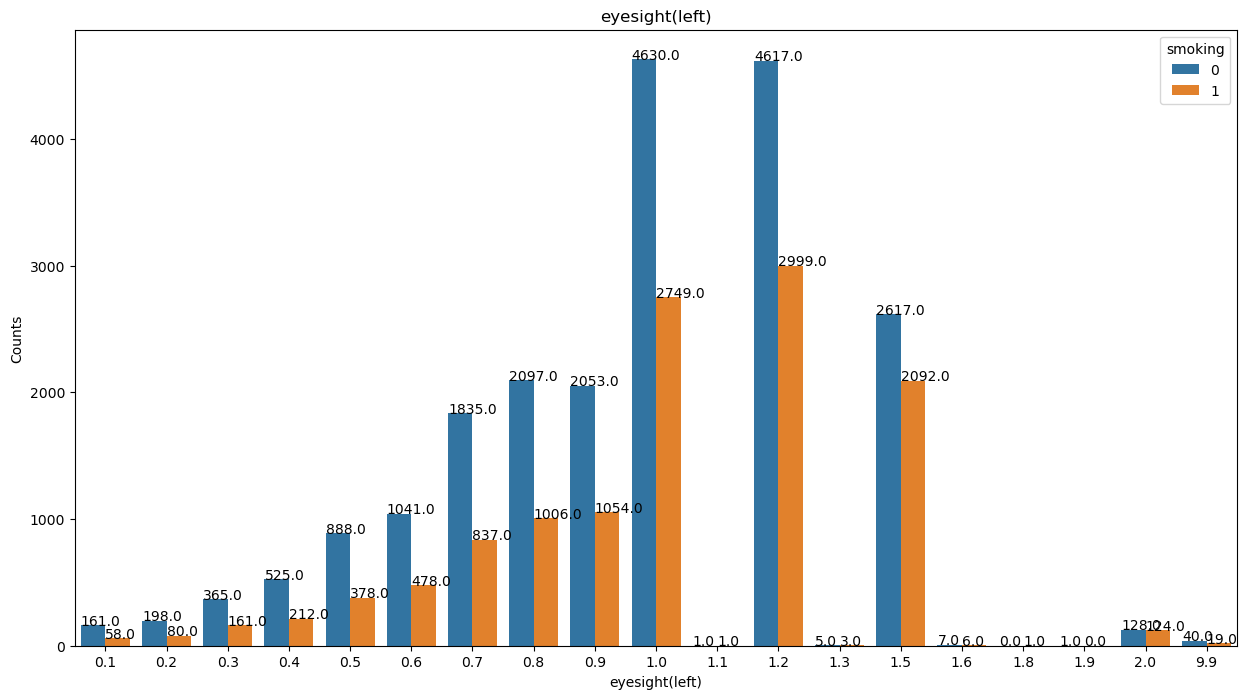

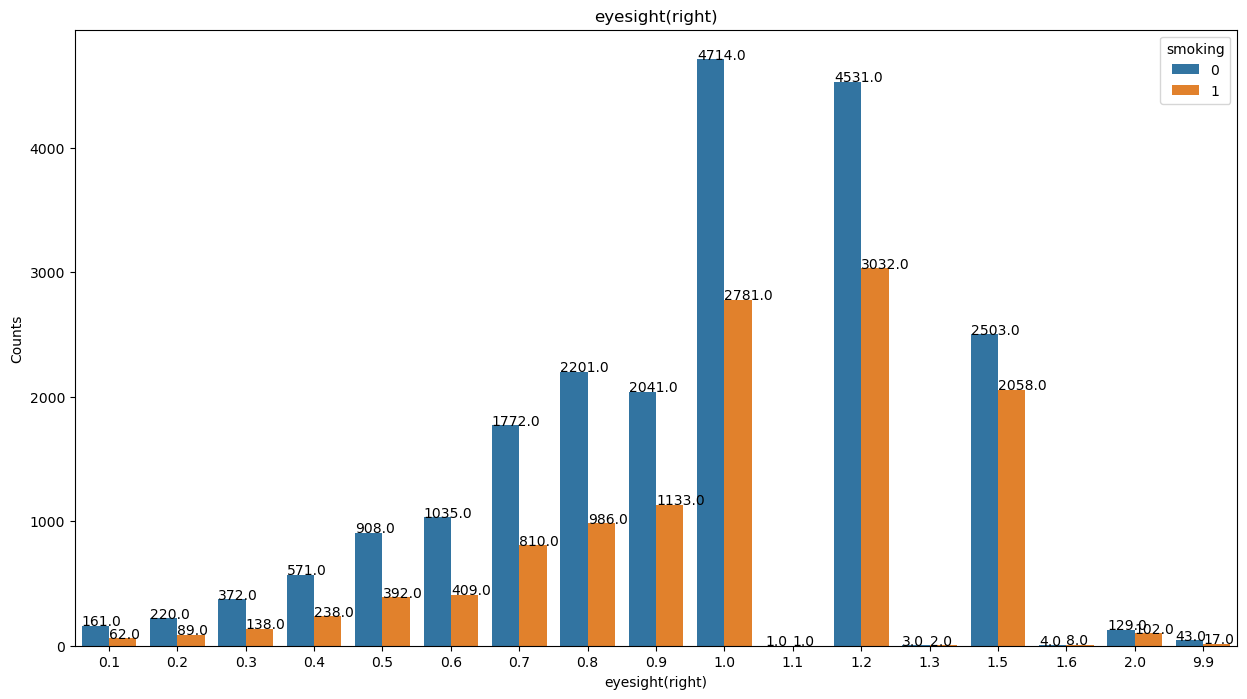

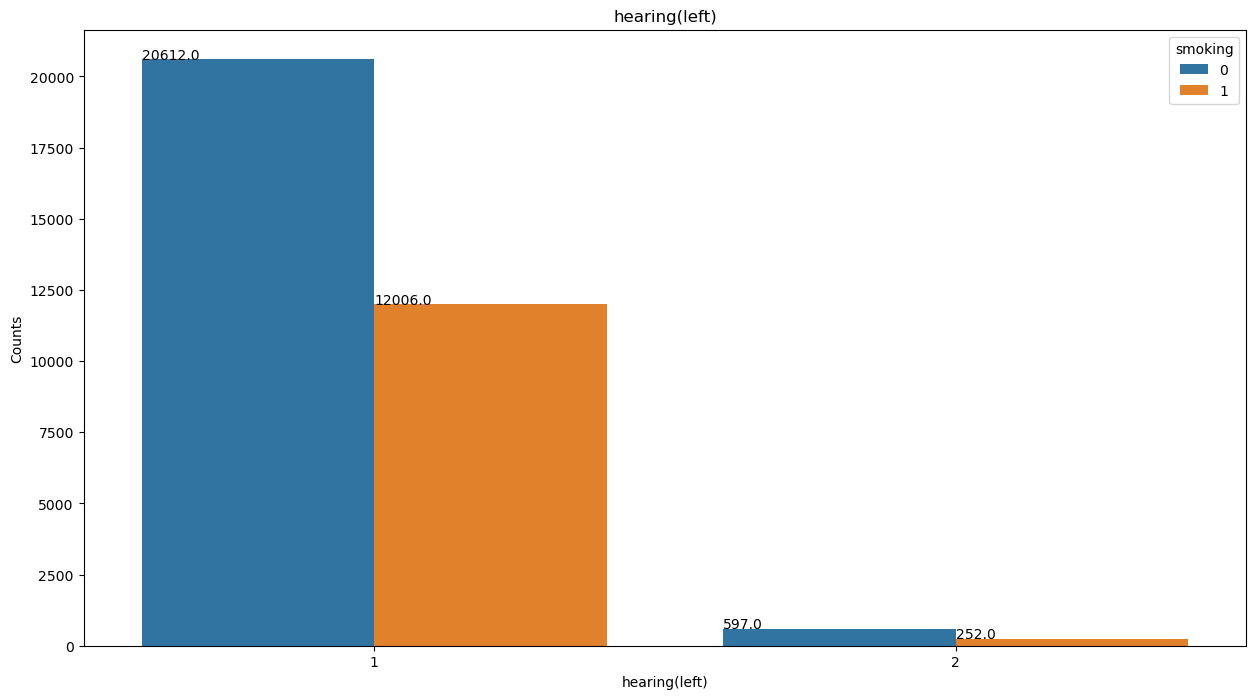

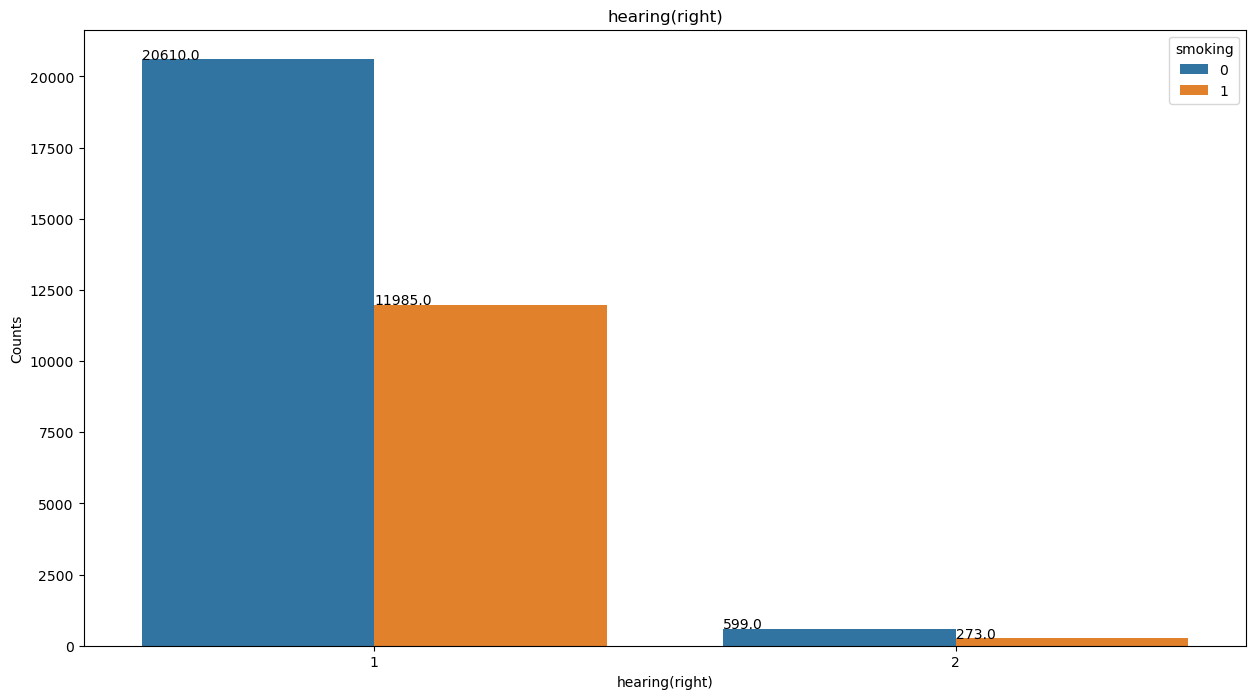

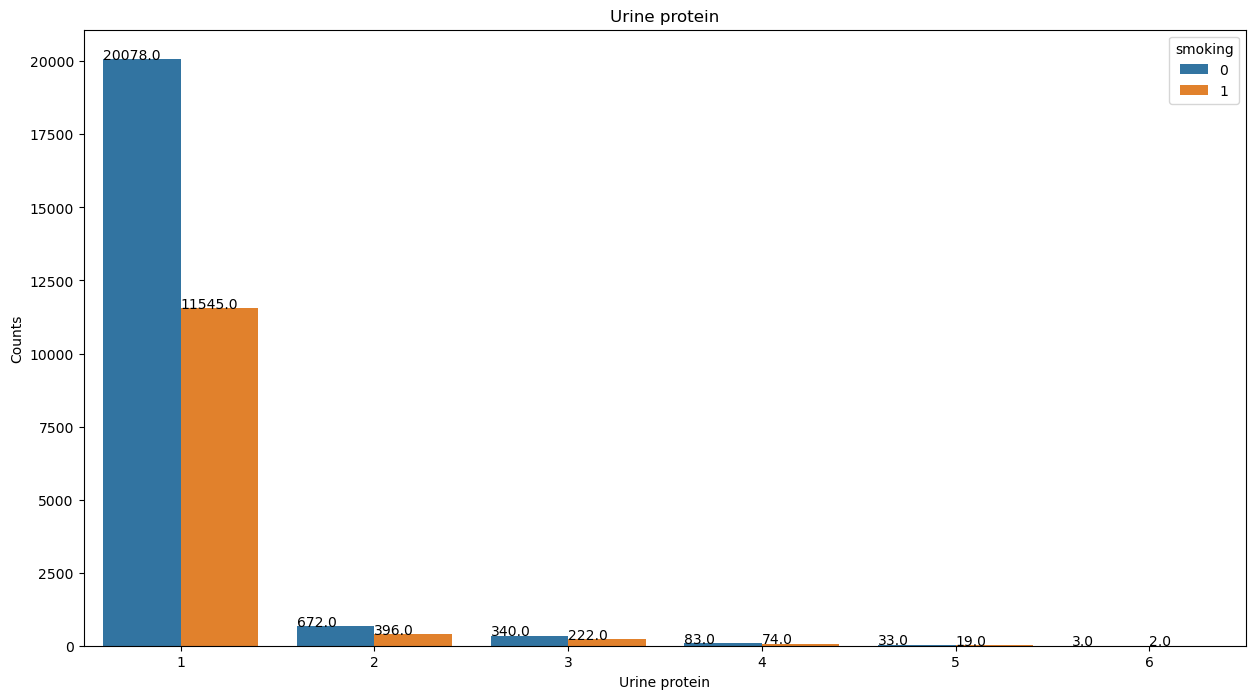

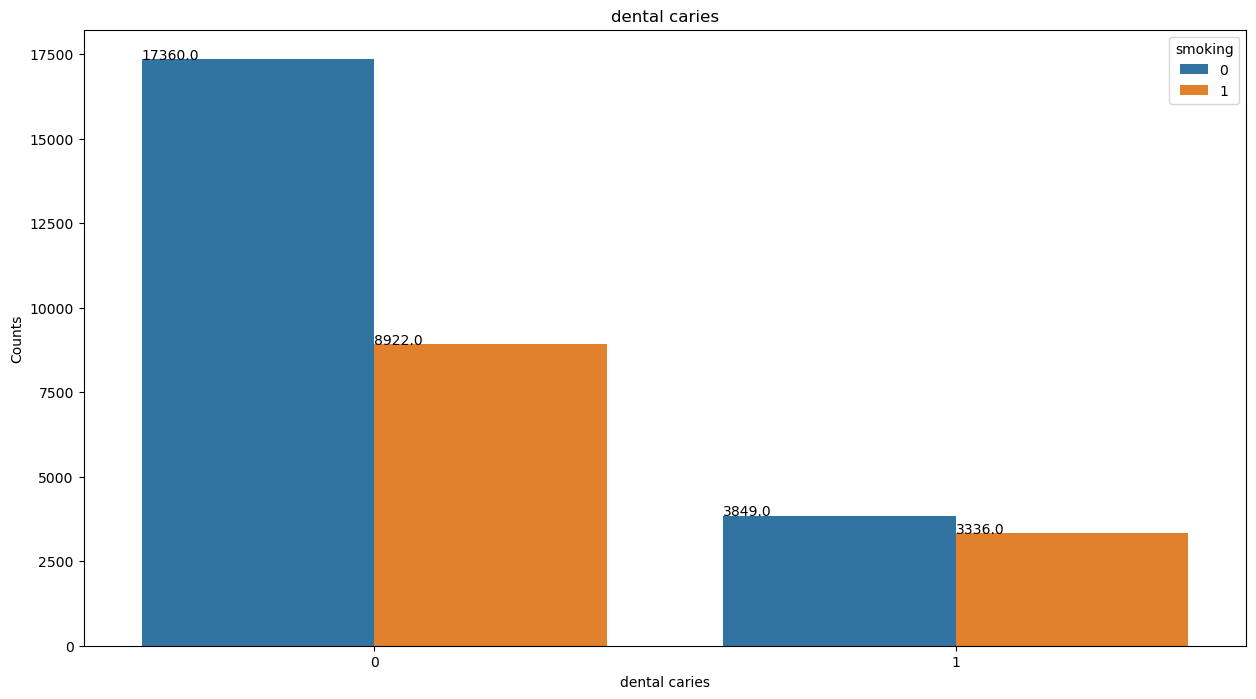

In [42]:
for feature in categorical:
    if feature != 'smoking':
        plt.figure(figsize=(15,8))
        ax = sns.countplot(data=new_df,x=feature,hue='smoking')
        for p in ax.patches:
            ax.text(p.get_x(),p.get_height(),p.get_height())
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('Counts')
        plt.show()

**From the disribution we can see that the highest number of smoker are those who are 40 yeares old**
*People whose height 170 cm are the highest among of those who smoke.*
**people who eyesight are right got the most numbers of smokers**

<Figure size 1200x900 with 0 Axes>

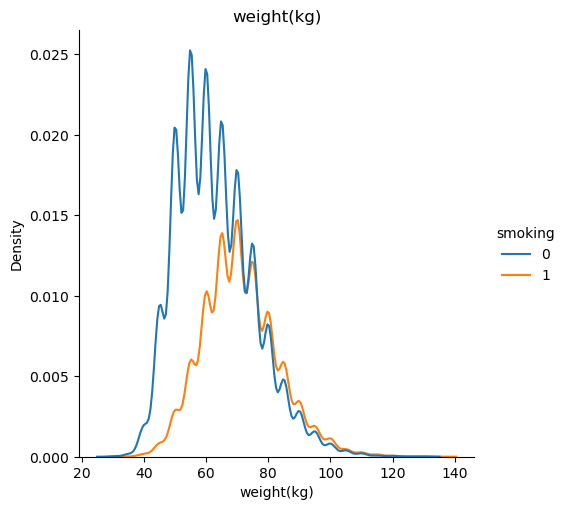

<Figure size 1200x900 with 0 Axes>

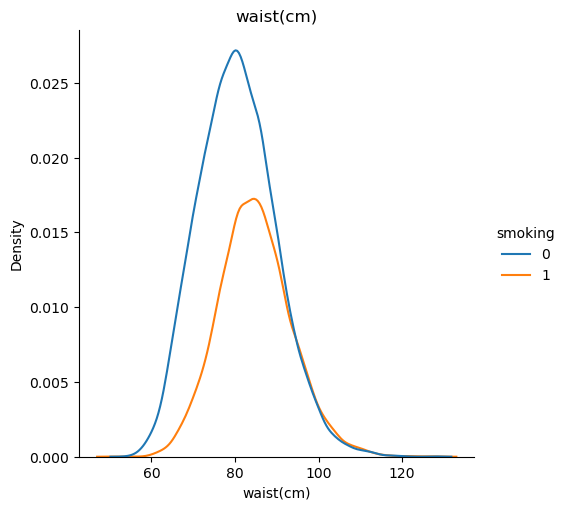

<Figure size 1200x900 with 0 Axes>

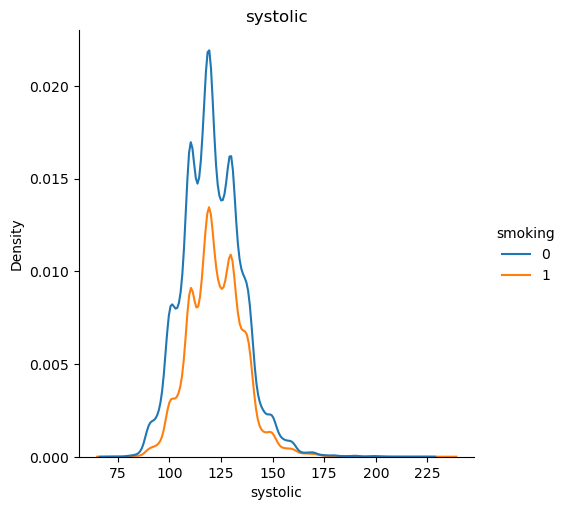

<Figure size 1200x900 with 0 Axes>

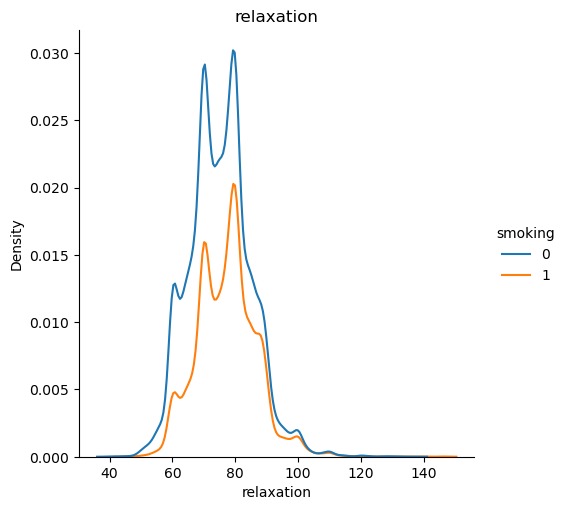

<Figure size 1200x900 with 0 Axes>

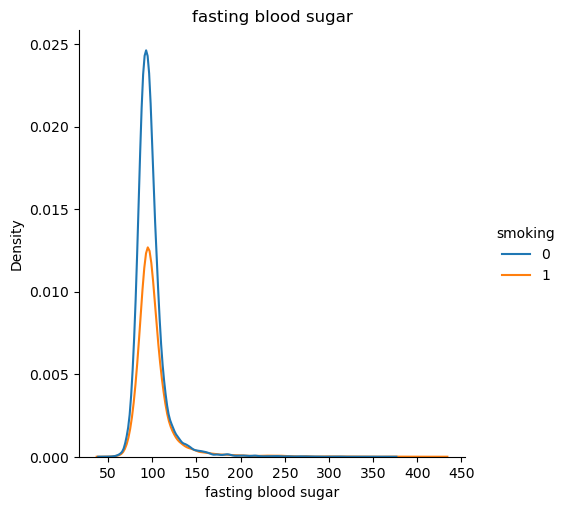

<Figure size 1200x900 with 0 Axes>

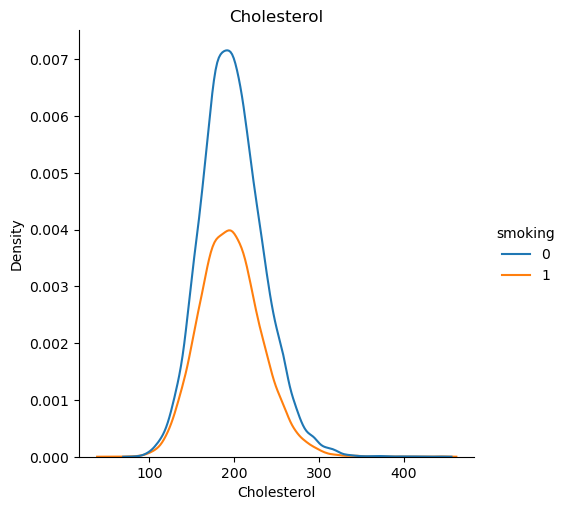

<Figure size 1200x900 with 0 Axes>

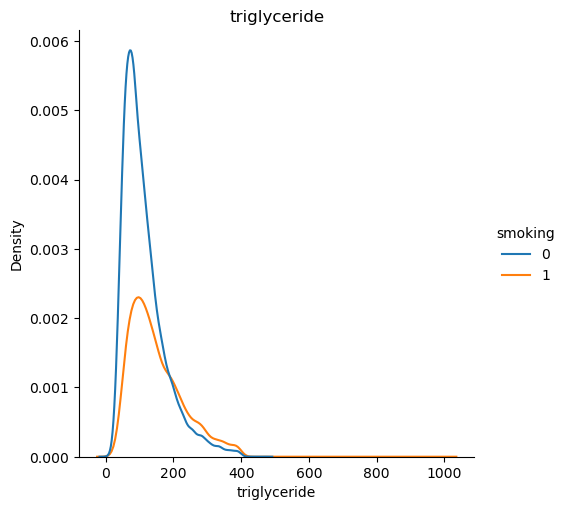

<Figure size 1200x900 with 0 Axes>

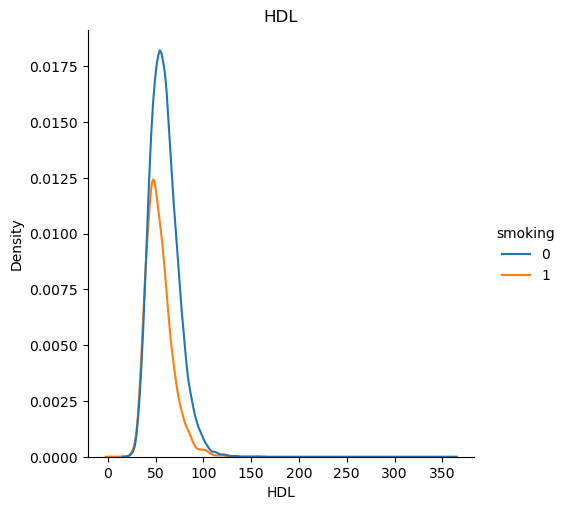

<Figure size 1200x900 with 0 Axes>

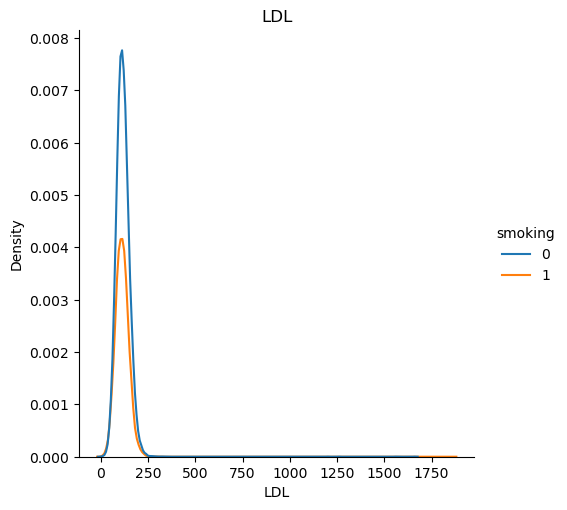

<Figure size 1200x900 with 0 Axes>

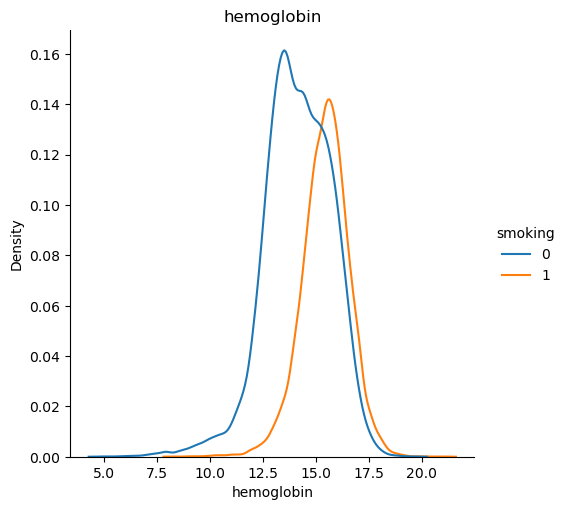

<Figure size 1200x900 with 0 Axes>

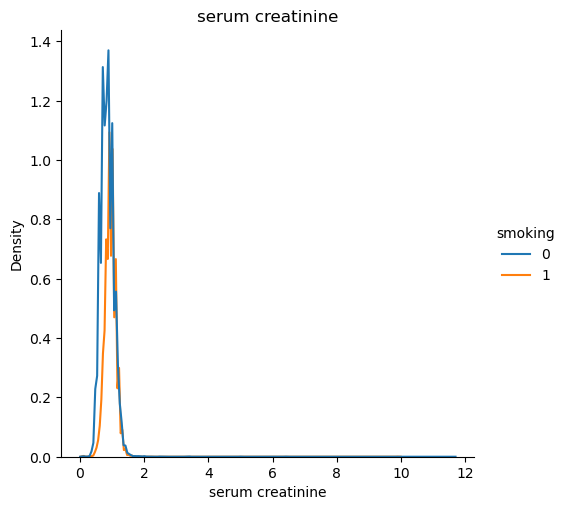

<Figure size 1200x900 with 0 Axes>

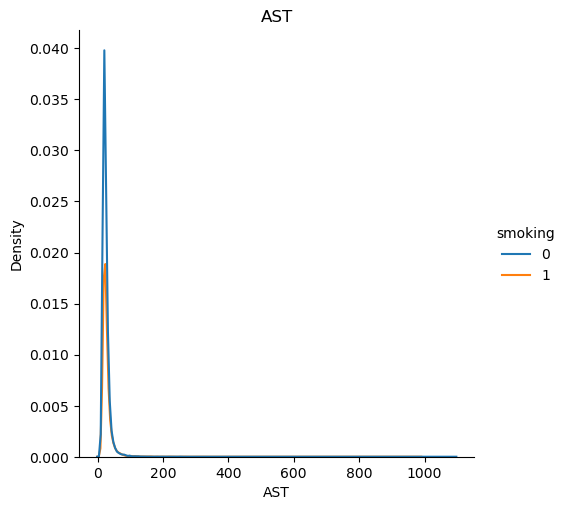

<Figure size 1200x900 with 0 Axes>

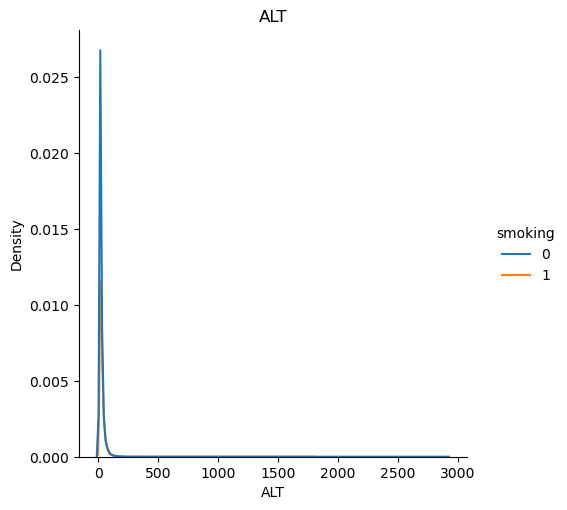

<Figure size 1200x900 with 0 Axes>

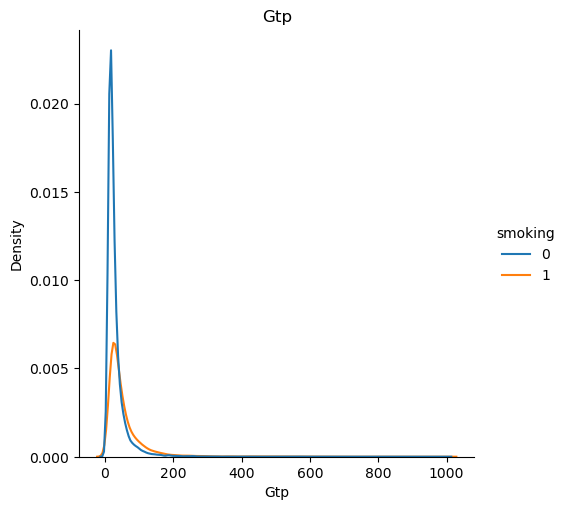

In [43]:
cont = [feature for feature in new_df.columns if feature not in categorical]

for feature in cont:
    plt.figure(figsize=(12,9))
    ax = sns.displot(data=new_df,x=feature,hue='smoking',kind='kde')
    plt.title(feature)
    plt.xlabel(feature)
    plt.show()

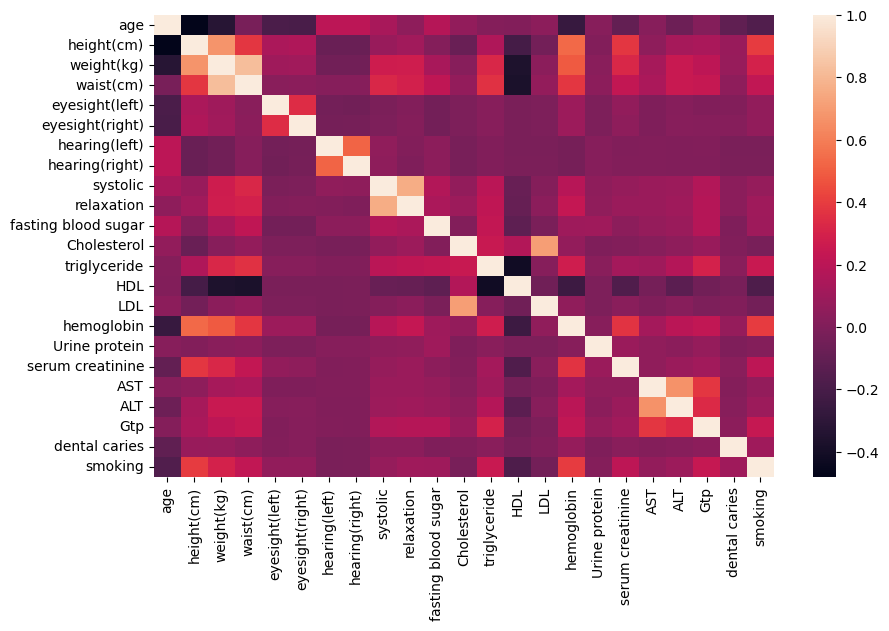

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr())
plt.show()

In [45]:
new_df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [170]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Or create a MinMaxScaler instance
# scaler = MinMaxScaler()

# Define the features you want to scale (exclude the target variable)
features_to_scale = new_df.columns.drop(['smoking'])

# Apply the scaling to the selected features
new_df[features_to_scale] = scaler.fit_transform(new_df[features_to_scale])

/tmp/ipykernel_13162/815790864.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[features_to_scale] = scaler.fit_transform(new_df[features_to_scale])


In [57]:
# Check data types
data_types = new_df.dtypes

# Check unique value counts
unique_value_counts = new_df.nunique()

# Combine the results
data_info = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_value_counts})
print(data_info)

                    Data Type  Unique Values
age                   float64             14
height(cm)            float64             13
weight(kg)            float64             22
waist(cm)             float64            545
eyesight(left)        float64             19
eyesight(right)       float64             17
hearing(left)         float64              2
hearing(right)        float64              2
systolic              float64            125
relaxation            float64             94
fasting blood sugar   float64            258
Cholesterol           float64            279
triglyceride          float64            389
HDL                   float64            122
LDL                   float64            286
hemoglobin            float64            143
Urine protein         float64              6
serum creatinine      float64             34
AST                   float64            195
ALT                   float64            230
Gtp                   float64            439
dental car

In [58]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = new_df.drop('smoking', axis=1)
y = new_df['smoking']

# Split the data into training and testing sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26773, 22)
(6694, 22)
(26773,)
(6694,)


In [60]:
y_train.head().T

1027     1
31130    1
20357    0
5941     0
26038    1
Name: smoking, dtype: int64

In [61]:
X_train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
1027,1.312674,-1.053148,-1.237041,-0.921712,-0.430942,-0.420907,-0.161334,-0.163562,0.695004,-0.105212,...,-0.652218,0.735896,1.061619,0.752397,-0.214721,-0.839812,-0.170335,-0.352388,-0.499398,-0.522859
31130,-0.758305,0.578044,-0.072242,-0.438381,0.375124,-0.019188,-0.161334,-0.163562,0.841301,0.721925,...,0.713361,0.667392,0.204314,0.688392,-0.214721,-0.389432,-0.276943,-0.194224,-0.219202,-0.522859
20357,-0.344109,0.034313,0.316024,-0.040976,0.375124,-0.019188,-0.161334,-0.163562,-1.645749,-1.552700,...,-0.819432,-0.908187,-0.189582,-1.423756,-0.214721,0.511329,-0.436855,-0.194224,-0.559440,1.912563
5941,-0.344109,1.665505,0.316024,-0.116161,-0.632458,-0.420907,-0.161334,-0.163562,-0.402224,-0.828956,...,-0.861235,0.324875,-0.120071,0.560383,4.748032,0.060949,-0.223639,-0.225856,-0.419342,-0.522859
26038,0.484282,0.034313,1.480822,1.817162,0.375124,-0.220047,-0.161334,-0.163562,1.572786,1.652453,...,2.051071,-1.661725,1.131130,0.368370,-0.214721,0.511329,-0.330247,-0.099325,0.361205,-0.522859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18012,-0.344109,-0.509417,-1.237041,-1.995780,-0.632458,-0.420907,-0.161334,-0.163562,-0.109630,-0.622172,...,-0.680087,1.420930,0.181144,-0.975725,-0.214721,-1.290192,0.042881,-0.289122,-0.499398,-0.522859
6419,-1.172501,1.121774,-0.072242,-0.277271,0.375124,0.985111,-0.161334,-0.163562,-1.572601,-1.656092,...,-0.889104,0.393379,0.714063,-0.143666,2.266655,0.511329,-0.276943,-0.130958,-0.439356,-0.522859
11809,-2.000892,0.034313,-0.460509,-0.975415,-0.027909,-0.019188,-0.161334,-0.163562,-0.841115,0.411748,...,0.727295,-0.839684,-0.235923,0.880406,-0.214721,0.511329,-0.383551,-0.004426,-0.459370,-0.522859
861,-0.344109,-1.053148,-0.072242,-0.116161,-1.640040,-0.420907,-0.161334,-0.163562,1.353341,2.066021,...,0.518278,-1.730229,0.412848,-0.207671,-0.214721,-0.389432,-0.117031,0.122105,-0.379314,-0.522859


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, precision_score

# Define models and their respective hyperparameters for tuning
models = {
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.001, 0.01, 0.1, 1, 10]
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30
        'min_samples_split': [2, 5, 10]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30]
    }),
    'Support Vector Machine': (SVC(), {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    'XGBoost': (XGBClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5]
    })
}

# Define a scoring function (e.g., precision) for model selection
scoring = make_scorer(precision_score)

# Initialize variables to keep track of the best model and its performance
best_model = None
best_precision = 0.0

# Loop through models and perform hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Cross-validation precision score for the best hyperparameters
    cross_val_precision = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring=scoring).mean()
    
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Cross-Validation Precision: {cross_val_precision:.4f}")
    print("\n")
    
    # Check if this model has the best precision
    if cross_val_precision > best_precision:
        best_precision = cross_val_precision
        best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)

print("Best Model:")
print(f"Precision on Testing Data: {precision:.4f}")

Model: Logistic Regression
Best Hyperparameters: {'C': 0.1}
Cross-Validation Precision: 0.6386


Model: Decision Tree
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5}
Cross-Validation Precision: 0.6005


Model: Random Forest
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 300}
Cross-Validation Precision: 0.6598




/home/edwin/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edwin/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edwin/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edwin/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetri

Model: Support Vector Machine
Best Hyperparameters: {'C': 1, 'kernel': 'rbf'}
Cross-Validation Precision: 0.6673


Model: XGBoost
Best Hyperparameters: {'max_depth': 3, 'n_estimators': 100}
Cross-Validation Precision: 0.6589


Best Model:
Precision on Testing Data: 0.6738


In [64]:
print("This is the best model {}".format(best_model))

This is the best model SVC(C=1)


In [76]:
best_model

SVC(C=1)

In [67]:
import pandas as pd

# Load the test data
test_data = pd.read_csv("test_dataset.csv")
test_data.head().T

,0,1,2,3,4
age,40.0,45.0,30.0,60.0,30.0
height(cm),170.0,170.0,180.0,170.0,170.0
weight(kg),65.0,75.0,90.0,50.0,65.0
waist(cm),75.1,89.0,94.0,73.0,78.0
eyesight(left),1.0,0.7,1.0,0.5,1.5
eyesight(right),0.9,1.2,0.8,0.7,1.0
hearing(left),1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0
systolic,120.0,100.0,115.0,118.0,110.0
relaxation,70.0,67.0,72.0,78.0,70.0


## evaluating the SVM model on the test dataset

In [68]:
test_predictions = best_model.predict(X_test)

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
accuracy = accuracy_score(y_test, test_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.6738255033557047
Recall: 0.5988071570576541
F1 Score: 0.6341052631578946
Accuracy: 0.7403645055273379


In [77]:
# Get the kernel type of the SVM model
kernel_type = best_model.kernel
print(f"Kernel Type: {kernel_type}")
print("okay")

Kernel Type: rbf
okay


In [85]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importances
perm_importance = permutation_importance(best_model, X_train, y_train, n_repeats=1, random_state=0)

In [86]:
# Get the importances and feature names
importances = perm_importance.importances_mean
feature_names = X_train.columns

In [87]:
# Pair feature names with their importances
feature_importances = list(zip(feature_names, importances))

In [88]:
# Sort features by importance
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [89]:
# Display or log the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")

print("done")

Feature: height(cm), Importance: 0.05255294513128894
Feature: Gtp, Importance: 0.04851903036641392
Feature: hemoglobin, Importance: 0.03253277555746459
Feature: age, Importance: 0.013894595301236268
Feature: triglyceride, Importance: 0.0128114144847421
Feature: ALT, Importance: 0.011840286856161009
Feature: serum creatinine, Importance: 0.011317371979232771
Feature: weight(kg), Importance: 0.010234191162738493
Feature: dental caries, Importance: 0.009375116722070698
Feature: systolic, Importance: 0.00829193590557653
Feature: fasting blood sugar, Importance: 0.008217233780301036
Feature: relaxation, Importance: 0.006984648713255881
Feature: HDL, Importance: 0.006723191274791707
Feature: LDL, Importance: 0.0063496806484144575
Feature: waist(cm), Importance: 0.0060508721473125915
Feature: Cholesterol, Importance: 0.00582676577148622
Feature: Urine protein, Importance: 0.005079744518731499
Feature: hearing(left), Importance: 0.004071265827512716
Feature: AST, Importance: 0.0040712658275127

In [4]:
import pandas as pd

In [5]:
testdf = pd.read_csv("test_dataset.csv")
testdf.T

,0,1,2,3,4,5,6,7,8,9,...,16698,16699,16700,16701,16702,16703,16704,16705,16706,16707
age,40.0,45.0,30.0,60.0,30.0,55.0,40.0,55.0,55.0,75.0,...,50.0,40.0,40.0,55.0,55.0,60.0,60.0,40.0,35.0,25.0
height(cm),170.0,170.0,180.0,170.0,170.0,175.0,160.0,175.0,160.0,145.0,...,155.0,175.0,175.0,150.0,150.0,165.0,155.0,155.0,165.0,180.0
weight(kg),65.0,75.0,90.0,50.0,65.0,60.0,55.0,60.0,50.0,50.0,...,55.0,75.0,70.0,50.0,45.0,65.0,70.0,50.0,70.0,80.0
waist(cm),75.1,89.0,94.0,73.0,78.0,75.0,69.0,80.0,68.0,81.0,...,77.0,78.0,87.0,70.1,74.5,82.0,93.0,67.2,76.1,87.0
eyesight(left),1.0,0.7,1.0,0.5,1.5,1.0,1.5,1.2,0.8,0.5,...,0.9,1.0,1.0,1.0,0.8,0.7,0.8,0.9,1.0,1.2
eyesight(right),0.9,1.2,0.8,0.7,1.0,1.0,1.5,1.5,0.5,0.5,...,0.8,1.0,1.0,0.9,0.8,1.0,1.0,0.8,1.0,0.9
hearing(left),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
systolic,120.0,100.0,115.0,118.0,110.0,100.0,112.0,137.0,137.0,148.0,...,140.0,120.0,118.0,106.0,118.0,101.0,134.0,134.0,114.0,110.0
relaxation,70.0,67.0,72.0,78.0,70.0,64.0,78.0,89.0,87.0,86.0,...,80.0,84.0,78.0,70.0,58.0,68.0,70.0,80.0,68.0,70.0


In [6]:
print(testdf.dtypes)

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
dtype: object


In [7]:
# Removing duplicate rows

print("Number of duplicate rows: ", testdf[testdf.duplicated() == True].shape[0])
print(f"Rows in original Dataframe: {testdf.shape[0]}")

data_test = testdf.drop_duplicates()

print(f"Dataframe rows after removing duplicates: {data_test.shape[0]}")

Number of duplicate rows:  998
Rows in original Dataframe: 16708
Dataframe rows after removing duplicates: 15710


In [8]:
print(data_test.isnull().sum())

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64


In [9]:
data_test.head().T

,0,1,2,3,4
age,40.0,45.0,30.0,60.0,30.0
height(cm),170.0,170.0,180.0,170.0,170.0
weight(kg),65.0,75.0,90.0,50.0,65.0
waist(cm),75.1,89.0,94.0,73.0,78.0
eyesight(left),1.0,0.7,1.0,0.5,1.5
eyesight(right),0.9,1.2,0.8,0.7,1.0
hearing(left),1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0
systolic,120.0,100.0,115.0,118.0,110.0
relaxation,70.0,67.0,72.0,78.0,70.0


In [10]:
import pickle
from sklearn.preprocessing import StandardScaler

# Extract the numerical features from the test data (exclude the target variable)
numerical_features = data_test.select_dtypes(include=['int64', 'float64'])


# Apply the scaling to the selected features
data_test[features_to_scale] = scaler.fit_transform(data_test[features_to_scale])


NameError: name 'scaler' is not defined

In [11]:
# Assuming you've loaded and preprocessed the test data into a variable called test_data
test_pred = best_model.predict(data_test)

NameError: name 'best_model' is not defined

In [12]:
print(test_pred)

NameError: name 'test_pred' is not defined

In [13]:
data_test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,260,41,132,15.7,1,0.8,24,26,32,0
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,345,49,140,15.7,1,1.1,26,28,138,0
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,103,53,103,13.5,1,1.0,19,29,30,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,70,65,108,14.1,1,1.3,31,28,33,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,210,45,103,14.7,1,0.8,21,21,19,0


In [14]:
# Add the predictions to the test DataFrame as a new column
data_test["smoking"] = test_pred

NameError: name 'test_pred' is not defined

In [15]:
dfsubs = data_test.loc[:, ['smoking']]

KeyError: "None of [Index(['smoking'], dtype='object')] are in the [columns]"

In [ ]:
dfsubs.loc[1]

In [ ]:
smokeYes = data_test[data_test["smoking"] == 1].shape[0]
smokeNo = data_test[data_test["smoking"] == 0].shape[0]

print("People who smoke: ", smokeYes)
print("People who DO NOT smoke: ", smokeNo)

In [16]:
import joblib

# Assuming your trained model is called 'best_model'
model_filename = 'best_model.pkl'
joblib.dump(best_model, model_filename)

NameError: name 'best_model' is not defined